# Post-Processing for Predicted Lung Masks

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

In [2]:
"""
pprocess - Function for Post-Processing

Arguments:
img {numpy.ndarray} -- input image 
SE {tuple} -- eliptical structuring element shape
thresh {int} -- threshold value, any connected compnents with pixel area below this value will be eliminated

Returns: 
final {numpy.ndarray} -- final post-processed image
"""
def pprocess(img, SE=(10,30), thresh=15000):
    
    ##### Post-processing 1: Hole Filling
    im_in = img
    # Thresholding
    # Setting up values >=200 to 0 and values <200 to 255.
    th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY);

    # Copying the thresholded image.
    im_floodfill = im_th.copy()

    # Mask for flood-filling
    # Here, the size should be 2 pixels larger than the orginal image.
    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Flood-fill starts from node (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

    # Invert flood-fill resultant image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)
  
    # bitwise OR (equavalent to union) the two images to get the final hole filled image.
    im_out = im_th | im_floodfill_inv
    

    ##### Post-processing 2: Removing Unwanted Components
    img = im_out/255
    img[img>0.5] = 1
    img[img<=0.5] = 0
    img = morphology.remove_small_objects(img.astype('bool'), thresh)
    img = np.array(img*255, dtype=np.uint8)

    
    ##### Post-processing 3: Morphological Opening 
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, SE))
    
    # returning the final post-processed image
    return img

# Sample Post-Processing Example

In [3]:
original_img = cv2.imread('images/sample.png',0)
processed_img = pprocess(original_img)

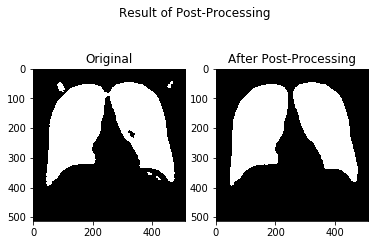

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Result of Post-Processing')
ax1.imshow(original_img, cmap='gray')
ax1.title.set_text('Original')
ax2.imshow(processed_img, cmap='gray')
ax2.title.set_text('After Post-Processing')